t = 0.01, x = 53.698040, y = 24.987473
t = 5.00, x = 25.526591, y = 19.433023


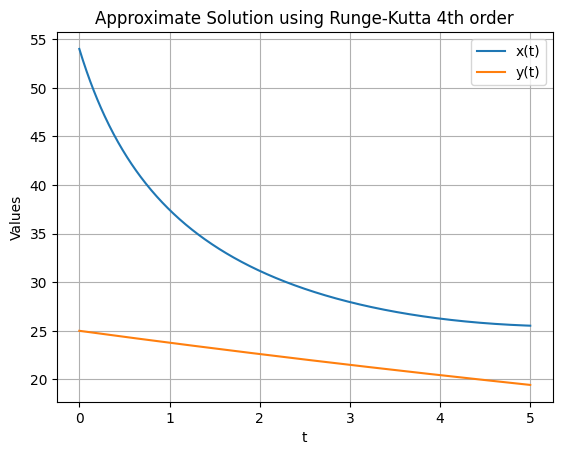

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, x, y):
    return 1.2*x*(1-x/45) - 0.7*(x**2)*y/(1+x**2)

def g(t, x, y):
    return -0.4*y + 0.35*(x**2)*y/(1+x**2)

def runge_kutta4(t, x, y, h):
    k1x = h * f(t, x, y)
    k1y = h * g(t, x, y)

    k2x = h * f(t + h/2, x + k1x/2, y + k1y/2)
    k2y = h * g(t + h/2, x + k1x/2, y + k1y/2)

    k3x = h * f(t + h/2, x + k2x/2, y + k2y/2)
    k3y = h * g(t + h/2, x + k2x/2, y + k2y/2)

    k4x = h * f(t + h, x + k3x, y + k3y)
    k4y = h * g(t + h, x + k3x, y + k3y)

    xn = x + (k1x + 2*k2x + 2*k3x + k4x)/6
    yn = y + (k1y + 2*k2y + 2*k3y + k4y)/6

    return xn, yn, k1x,k1y,k2x,k2y,k3x,k3y,k4x,k4y

# Giá trị ban đầu
t0 = 0
x0 = 54
y0 = 25

# Điểm cuối
t_end = 500

# Bước lưới
h = 0.01

# Số lượng điểm lưới
num_points = int((t_end - t0) / h) + 1
num_points = 500 + 1
# Khởi tạo mảng chứa giá trị t, x và y
t_values = np.zeros(num_points)
x_values = np.zeros(num_points)
y_values = np.zeros(num_points)

# Gán giá trị ban đầu
t_values[0] = t0
x_values[0] = x0
y_values[0] = y0

#print(f"t = {t_values[0]:.2f}, x = {x_values[0]:.6f}, y = {y_values[0]:.6f}")
# Giải bài toán
for i in range(1, num_points):
    t = t_values[i-1]
    x = x_values[i-1]
    y = y_values[i-1]

    x_next, y_next, k1x,k1y,k2x,k2y,k3x,k3y,k4x,k4y = runge_kutta4(t, x, y, h)
    t_values[i] = t + h
    x_values[i] = x_next
    y_values[i] = y_next
    #print(f"t = {t_values[i]:.2f}, x = {x_values[i]:.6f}, y = {y_values[i]:.6f}, k1x={k1x}, k1y={k1y}, k2x={k2x}, k2y={k2y}, k3x={k3x}, k3y={k3y}, k4x={k4x}, k4y={k4y}")

# Hiển thị kết quả
# for i in range(num_points):
#     print(f"t = {t_values[i]:.2f}, x = {x_values[i]:.6f}, y = {y_values[i]:.6f}")
print(f"t = {t_values[1]:.2f}, x = {x_values[1]:.6f}, y = {y_values[1]:.6f}")
print(f"t = {t_values[500]:.2f}, x = {x_values[500]:.6f}, y = {y_values[500]:.6f}")
# Vẽ đồ thị
plt.plot(t_values, x_values, label='x(t)')
plt.plot(t_values, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('Values')
plt.title('Approximate Solution using Runge-Kutta 4th order')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


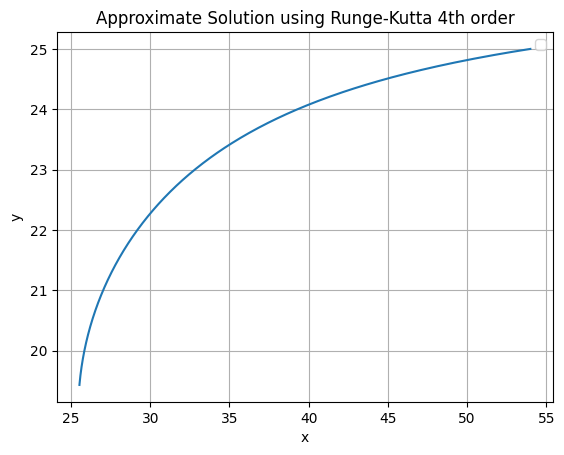

In [13]:
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximate Solution using Runge-Kutta 4th order')
plt.legend()
plt.grid(True)
plt.show()


# AB4-AM4

In [14]:
num_points = len(t_values)
x_values = np.zeros(num_points)
y_values = np.zeros(num_points)

# Khởi tạo giá trị đầu tiên
x_values[0] = x0
y_values[0] = y0

for i in range(3):
    # Sử dụng Runge-Kutta bậc 4 để khởi tạo giá trị
    x_values[i+1], y_values[i+1], _, _, _, _, _, _, _, _ = runge_kutta4(t_values[i], x_values[i], y_values[i], h)

# Áp dụng phương pháp AB4-AM4
for i in range(3, num_points - 1):
    # Dự báo bằng phương pháp AB4
    x_values[i+1] = x_values[i] + h/24 * (55*f(t_values[i], x_values[i], y_values[i]) - 59*(f(t_values[i-1], x_values[i-1], y_values[i-1])) + 37*f(t_values[i-2], x_values[i-2], y_values[i-2]) - 9*f(t_values[i-3], x_values[i-3], y_values[i-3]))
    y_values[i+1] = y_values[i] + h/24 * (55*g(t_values[i], x_values[i], y_values[i]) - 59*(g(t_values[i-1], x_values[i-1], y_values[i-1])) + 37*g(t_values[i-2], x_values[i-2], y_values[i-2]) - 9*g(t_values[i-3], x_values[i-3], y_values[i-3]))
    if(i+1 == 500):
        print(f"Dự đoán AB4 cho (x{i+1},y{i+1}) là ({x_values[i+1]},{y_values[i+1]})")
    
    
    # Hiệu chỉnh bằng phương pháp AM4
    x_values[i+1] = x_values[i] + h/24 * (9*f(t_values[i+1], x_values[i+1], y_values[i+1]) + 19*f(t_values[i], x_values[i], y_values[i]) - 5*f(t_values[i-1], x_values[i-1], y_values[i-1]) + f(t_values[i-2], x_values[i-2], y_values[i-2]))
    y_values[i+1] = y_values[i] + h/24 * (9*g(t_values[i+1], x_values[i+1], y_values[i+1]) + 19*g(t_values[i], x_values[i], y_values[i]) - 5*g(t_values[i-1], x_values[i-1], y_values[i-1]) + g(t_values[i-2], x_values[i-2], y_values[i-2]))
    if(i+1 == 500):
        print(f"Hiệu chỉnh AM4 cho (x{i+1},y{i+1}) là ({x_values[i+1]},{y_values[i+1]})")


Dự đoán AB4 cho (x500,y500) là (25.52659050967947,19.433022967641005)
Hiệu chỉnh AM4 cho (x500,y500) là (25.526590509675305,19.433022967641)


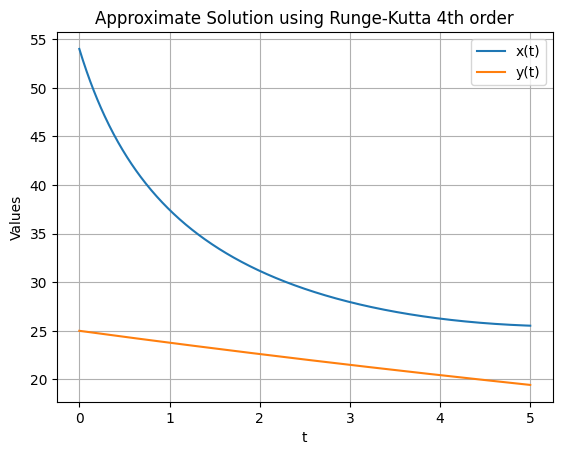

In [15]:
# Vẽ đồ thị
plt.plot(t_values, x_values, label='x(t)')
plt.plot(t_values, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('Values')
plt.title('Approximate Solution using Runge-Kutta 4th order')
plt.legend()
plt.grid(True)
plt.show()

# RK 1 Phương trình

x = 0.10, y = 1.005758


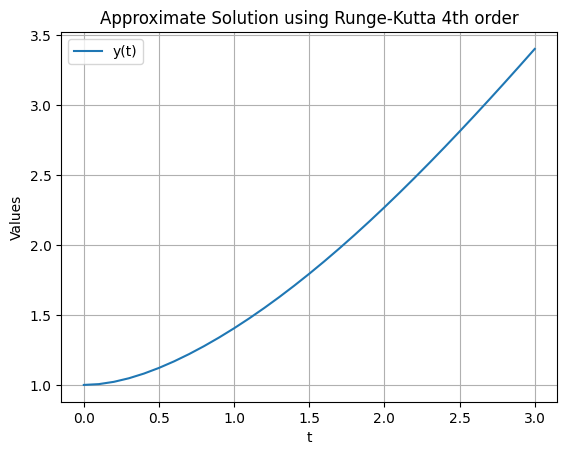

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#coi t như x
def g(x, y):
    return 1.2*x*(1-x/45) - 0.7*(x**2)*y/(1+x**2)

def runge_kutta4(t,y, h):
    k1y = h * g(t, y)
    k2y = h * g(t + h/2, y + k1y/2)
    k3y = h * g(t + h/2, y + k2y/2)
    k4y = h * g(t + h, y + k3y)
    yn = y + (k1y + 2*k2y + 2*k3y + k4y)/6

    return yn,k1y,k2y,k3y,k4y

# Giá trị ban đầu
t0 = 0
y0 = 1

# Điểm cuối
t_end = 3

# Bước lưới
h = 0.1

# Số lượng điểm lưới
num_points = int((t_end - t0) / h) + 1
# Khởi tạo mảng chứa giá trị t, x và y
t_values = np.zeros(num_points)
y_values = np.zeros(num_points)

# Gán giá trị ban đầu
t_values[0] = t0
y_values[0] = y0

# Giải bài toán
for i in range(1, num_points):
    t = t_values[i-1]
    y = y_values[i-1]

    y_next,k1y,k2y,k3y,k4y = runge_kutta4(t, y, h)

    t_values[i] = t + h
    y_values[i] = y_next

print(f"x = {t_values[1]:.2f}, y = {y_values[1]:.6f}")
# Vẽ đồ thị
plt.plot(t_values, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('Values')
plt.title('Approximate Solution using Runge-Kutta 4th order')
plt.legend()
plt.grid(True)
plt.show()


# AB-AM4 1 PT

In [17]:
num_points = len(t_values)
y_values = np.zeros(num_points)

# Khởi tạo giá trị đầu tiên
y_values[0] = y0

for i in range(3):
    # Sử dụng Runge-Kutta bậc 4 để khởi tạo giá trị
    y_values[i+1], _, _, _, _ = runge_kutta4(t_values[i], y_values[i], h)
    print(y_values[i+1])

# Áp dụng phương pháp AB4-AM4
for i in range(3, num_points - 1):
    # Dự báo bằng phương pháp AB4
    y_values[i+1] = y_values[i] + h/24 * (55*g(t_values[i], y_values[i]) - 59*(g(t_values[i-1], y_values[i-1])) + 37*g(t_values[i-2], y_values[i-2]) - 9*g(t_values[i-3], y_values[i-3]))
    if(i+1 == 500):
        print(f"Dự đoán AB4 cho (x{i+1},y{i+1}) là ({t_values[i+1]},{y_values[i+1]})")

    # Hiệu chỉnh bằng phương pháp AM4
    y_values[i+1] = y_values[i] + h/24 * (9*g(t_values[i+1], y_values[i+1]) + 19*g(t_values[i], y_values[i]) - 5*g(t_values[i-1], y_values[i-1]) + g(t_values[i-2], y_values[i-2]))
    if(i+1 == 500):
        print(f"Hiệu chỉnh AM4 cho (x{i+1},y{i+1}) là ({t_values[i+1]},{y_values[i+1]})")


1.0057583824652638
1.0220814238346578
1.0476069227600588


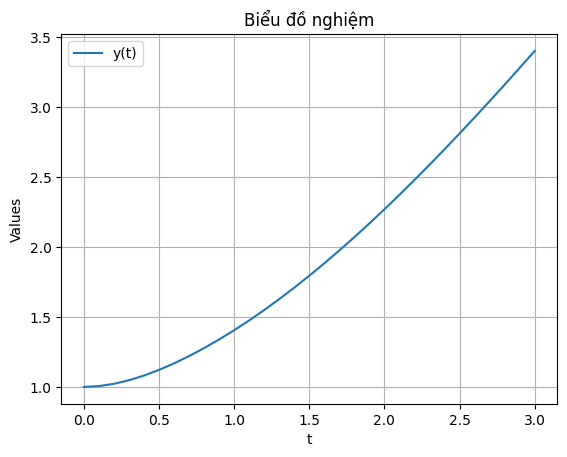

In [18]:
# Vẽ đồ thị
plt.plot(t_values, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('Values')
plt.title('Biểu đồ nghiệm')
plt.legend()
plt.grid(True)
plt.show()